In [6]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from numpy import random


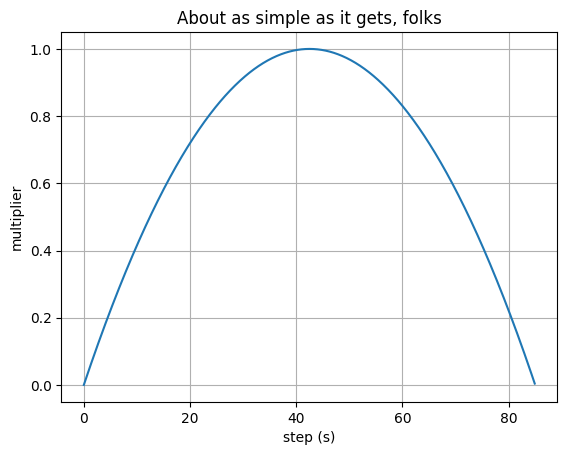

In [10]:
# Data for plotting
n_max = random.randint(100)+1
n_min = 0
delta = (n_max - n_min) / 1000
t = np.arange(n_min, n_max, delta)
s = (t - n_min) * (n_max - t) / ((n_max - n_min)/2)**2

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='step (s)', ylabel='multiplier',
       title='About as simple as it gets, folks')
ax.grid()

# fig.savefig("test.png")
plt.show()

In [ ]:
fn = tanh